In [348]:
import pandas as pd 
from googleplaces import GooglePlaces, types, lang
import config
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
import numpy as np
import matplotlib.pyplot as plt
from googleplaces import GooglePlaces, types, lang
from sklearn.cluster import KMeans
from geopy import Point
from geopy.distance import geodesic


In [349]:
df = pd.read_csv("/Users/tonypark/Desktop/machine-learning-housing-project/communal/Ames_Housing_Price_Data_cleaned_2.csv")
pd.set_option('display.max_columns', None)
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")



In [4]:
API_KEY = config.API_KEY
google_places = GooglePlaces(API_KEY)


In [5]:
location = df[["Neighborhood", "Prop_Addr","lat", "long", "SalePrice", "1stFlrSF", "2ndFlrSF"]]

In [6]:
location["price_per_sf"] = location["SalePrice"]/(location["1stFlrSF"] + location["2ndFlrSF"])
location["log_price"] = np.log(location["SalePrice"])

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
hotspots = {
#     "Iowa State University":[42.0266573, -93.64982669999999],
#     "Ames Golf & Country Club": [42.073919, -93.6574871], 
#     "Charles & June Calhoun Park":[42.0624538,-93.6235779], 
    "Fareway Grocery":[42.0570068,-93.64628599999999], 
    "Walmart":[42.05416773745256, -93.62258005886497],
    "Hy_vee grocery":[42.02284747913554, -93.66986405648123],
    "Asia Foods Store":[42.023349618859775, -93.61775502097211]   
}

In [32]:
search_result = google_places.nearby_search(
        location = "Ames Iowa", 
        radius = 10000, 
        keyword = "Fareway Grocery")
search_result.places

[<Place name="Fareway Grocery", lat=42.0570068, lng=-93.64628599999999>,
 <Place name="Fareway Grocery", lat=42.0272623, lng=-93.6158102>,
 <Place name="Fareway Meat Market", lat=42.0224318, lng=-93.66858259999999>]

In [43]:
def distance(row, other_location):
    neighborhoodLocation = Point(row['lat'],row['long'])
    return round(geodesic(neighborhoodLocation,other_location).miles,2)

In [73]:
def get_closest_grocery(row):
    min_dist = float("inf")
    temp = None
    for grocery in hotspots:
        d = distance(row, Point([hotspots[grocery][0], hotspots[grocery][1]]))
        
        if d < min_dist:
            min_dist = d
            temp = grocery
    
    return temp
        

In [158]:
df["ExterQual"].unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

In [159]:
df["ExterQual"] = df["ExterQual"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [156]:
df["BsmtQual"] = df["BsmtQual"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [150]:
df["GarageCond"] = df["GarageCond"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [151]:
df["BsmtCond"] = df["BsmtCond"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [152]:
df["ExterCond"] = df["ExterCond"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [161]:
df["KitchenQual"] = df["KitchenQual"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [163]:
df["GarageQual"] = df["GarageQual"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [176]:
df["FireplaceQu"] = df["FireplaceQu"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [181]:
df["HeatingQC"] = df["HeatingQC"].apply(lambda x: 
                                          4 if x == "Ex" else
                                          0 if x =="Po" else 
                                          1 if x =="TA" else 
                                          2 if x == "Fa" else 
                                          3 if x=="Gd" else 
                                          np.nan)

In [183]:
df["HeatingQC"].unique()
1,2,3,4
v8 v6 normal v1 = dummify 



array([1, 4, 3, 2, 0])

In [180]:
df.filter(regex="HeatingQC")

HeatingQC
0           TA
1           TA
2           TA
3           Ex
4           Gd
...        ...
2619        Fa
2620        Ex
2621        TA
2622        Ex
2623        Ex

[2624 rows x 1 columns]

In [174]:
df.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

<AxesSubplot:>

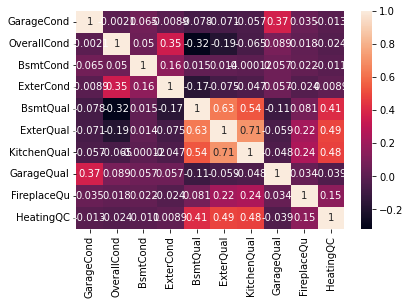

In [182]:
import seaborn as sns
sns.heatmap(df[["GarageCond","OverallCond", "BsmtCond", "ExterCond","BsmtQual",
    "ExterQual","KitchenQual","GarageQual","FireplaceQu","HeatingQC"]].corr(), annot=True)

In [74]:
location["closest_grocery"] = location.apply(lambda row: get_closest_grocery(row), axis=1)
                                                          
                                                          
                                                          
                                                          
                                                          

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
location

Neighborhood            Prop_Addr        lat       long  SalePrice  \
0           SWISU      436 HAYWARD AVE  42.017780 -93.651452     126000   
1         Edwards         3416 WEST ST  42.024697 -93.664186     139500   
2         Edwards         3416 WEST ST  42.024697 -93.664186     139500   
3          IDOTRR         320 S 2ND ST  42.021389 -93.614855     124900   
4         OldTown     1524 DOUGLAS AVE  42.038070 -93.612065     114000   
...           ...                  ...        ...        ...        ...   
2619      BrkSide   1021 RIDGEWOOD AVE  42.031937 -93.626510     121000   
2620      Edwards        3619 MARY CIR  42.027798 -93.666899     139600   
2621      Crawfor  2140 SUNSET DR 2142  42.019944 -93.643206     145000   
2622      CollgCr    5319 CLEMENS BLVD  42.016826 -93.690382     217500   
2623      SawyerW      1025 VERMONT CT  42.031651 -93.682452     215000   

      1stFlrSF  2ndFlrSF  price_per_sf  log_price   closest_grocery  
0          856         0    147.196262  11.744037    Hy_vee grocery  
1         1049         0    132.983794  11.845820    Hy_vee grocery  
2         1049         0    132.983794  11.845820    Hy_vee grocery  
3         1001         0    124.775225  11.735269  Asia Foods Store  
4          717       322    109.720885  11.643954  Asia Foods Store  
...        ...       ...           ...        ...               ...  
2619       952         0    127.100840  11.703546  Asia Foods Store  
2620      1733         0     80.553953  11.846536    Hy_vee grocery  
2621      1001      1001     72.427572  11.884489  Asia Foods Store  
2622       985       857    118.078176  12.289954    Hy_vee grocery  
2623      1065       846    112.506541  12.278393    Hy_vee grocery  

[2624 rows x 10 columns]

In [55]:
location.head()

Neighborhood         Prop_Addr        lat       long  SalePrice  1stFlrSF  \
0        SWISU   436 HAYWARD AVE  42.017780 -93.651452     126000       856   
1      Edwards      3416 WEST ST  42.024697 -93.664186     139500      1049   
2      Edwards      3416 WEST ST  42.024697 -93.664186     139500      1049   
3       IDOTRR      320 S 2ND ST  42.021389 -93.614855     124900      1001   
4      OldTown  1524 DOUGLAS AVE  42.038070 -93.612065     114000       717   

   2ndFlrSF  price_per_sf  log_price  closest_grocery  
0         0    147.196262  11.744037             1.01  
1         0    132.983794  11.845820             0.32  
2         0    132.983794  11.845820             0.32  
3         0    124.775225  11.735269             0.20  
4       322    109.720885  11.643954             1.06

In [81]:
x = pd.get_dummies(k_df["closest_grocery"], drop_first=True)

In [82]:
x["log_price"] = k_df["log_price"]
x["lat"] = k_df["lat"]
x["long"] = k_df["log"]



In [90]:
x["lat"] = k_df["lat"]
x["long"] = k_df["long"]

In [77]:
k_df = location[["lat", "long", "closest_grocery", "log_price"]]

In [92]:
kmean = KMeans(4).fit_predict(x)


In [93]:
x["groups"] = kmean

In [69]:
#takes in a string of category (i.e. "school", "restaruant", etc)
#return a list of places for the category
def grab_nearby(category):
    
    #import packages
    import pandas as pd 
    from googleplaces import GooglePlaces, types, lang
    
    #empty result list
    result = []
    
    #append resulting query to result list
    search_result = google_places.nearby_search(
        location = "Ames Iowa", 
        radius = 10000, 
        keyword = category)
    
    result.append(search_result.places)
    
    #the query returns frist 20 results, iterate through next page token for rest of results 
    while search_result.has_next_page_token:
        search_result = google_places.nearby_search(
            location = "Ames Iowa",
            radius = 10000,
            keyword = category,
            pagetoken=search_result.pagetoken #add the token for the next page
        )
        result.append(search_result.places)
        
    return result
        

In [50]:
location.head()

Neighborhood         Prop_Addr        lat       long  SalePrice  1stFlrSF  \
0        SWISU   436 HAYWARD AVE  42.017780 -93.651452     126000       856   
1      Edwards      3416 WEST ST  42.024697 -93.664186     139500      1049   
2      Edwards      3416 WEST ST  42.024697 -93.664186     139500      1049   
3       IDOTRR      320 S 2ND ST  42.021389 -93.614855     124900      1001   
4      OldTown  1524 DOUGLAS AVE  42.038070 -93.612065     114000       717   

   2ndFlrSF  price_per_sf  log_price  closest_grocery  
0         0    147.196262  11.744037             1.01  
1         0    132.983794  11.845820             0.32  
2         0    132.983794  11.845820             0.32  
3         0    124.775225  11.735269             0.20  
4       322    109.720885  11.643954             1.06

In [61]:
location

Neighborhood            Prop_Addr        lat       long  SalePrice  \
0           SWISU      436 HAYWARD AVE  42.017780 -93.651452     126000   
1         Edwards         3416 WEST ST  42.024697 -93.664186     139500   
2         Edwards         3416 WEST ST  42.024697 -93.664186     139500   
3          IDOTRR         320 S 2ND ST  42.021389 -93.614855     124900   
4         OldTown     1524 DOUGLAS AVE  42.038070 -93.612065     114000   
...           ...                  ...        ...        ...        ...   
2619      BrkSide   1021 RIDGEWOOD AVE  42.031937 -93.626510     121000   
2620      Edwards        3619 MARY CIR  42.027798 -93.666899     139600   
2621      Crawfor  2140 SUNSET DR 2142  42.019944 -93.643206     145000   
2622      CollgCr    5319 CLEMENS BLVD  42.016826 -93.690382     217500   
2623      SawyerW      1025 VERMONT CT  42.031651 -93.682452     215000   

      1stFlrSF  2ndFlrSF  price_per_sf  log_price  closest_grocery  
0          856         0    147.196262  11.744037             1.01  
1         1049         0    132.983794  11.845820             0.32  
2         1049         0    132.983794  11.845820             0.32  
3         1001         0    124.775225  11.735269             0.20  
4          717       322    109.720885  11.643954             1.06  
...        ...       ...           ...        ...              ...  
2619       952         0    127.100840  11.703546             0.74  
2620      1733         0     80.553953  11.846536             0.37  
2621      1001      1001     72.427572  11.884489             1.33  
2622       985       857    118.078176  12.289954             1.13  
2623      1065       846    112.506541  12.278393             0.89  

[2624 rows x 10 columns]

In [88]:
x

Fareway Grocery  Hy_vee grocery  Walmart  log_price  groups
0                   0               1        0  11.744037       1
1                   0               1        0  11.845820       1
2                   0               1        0  11.845820       1
3                   0               0        0  11.735269       0
4                   0               0        0  11.643954       4
...               ...             ...      ...        ...     ...
2619                0               0        0  11.703546       4
2620                0               1        0  11.846536       1
2621                0               0        0  11.884489       0
2622                0               1        0  12.289954       5
2623                0               1        0  12.278393       5

[2624 rows x 5 columns]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   2.,   0.,   2.,   1.,   5.,   6.,  14.,   6.,  14.,
         36.,  52.,  45.,  74., 118., 176., 260., 276., 256., 186., 233.,
        169., 152., 129., 107.,  79.,  57.,  51.,  34.,  29.,  20.,  10.,
          8.,   3.,   4.,   5.,   0.,   1.]),
 array([ 9.45634071,  9.53790335,  9.619466  ,  9.70102864,  9.78259129,
         9.86415394,  9.94571658, 10.02727923, 10.10884188, 10.19040452,
        10.27196717, 10.35352982, 10.43509246, 10.51665511, 10.59821776,
        10.6797804 , 10.76134305, 10.8429057 , 10.92446834, 11.00603099,
        11.08759363, 11.16915628, 11.25071893, 11.33228157, 11.41384422,
        11.49540687, 11.57696951, 11.65853216, 11.74009481, 11.82165745,
        11.9032201 , 11.98478275, 12.06634539, 12.14790804, 12.22947068,
        12.31103333, 12.39259598, 12.47415862, 12.55572127, 12.63728392,
        12.71884656, 12.80040921, 12.88197186, 12.9635345 , 13.04509715,
 

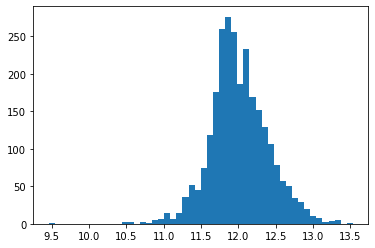

In [104]:
plt.hist(k_df["log_price"], bins=50
        )

In [110]:
x.drop(columns={"groups","log_price"}, inplace=True)

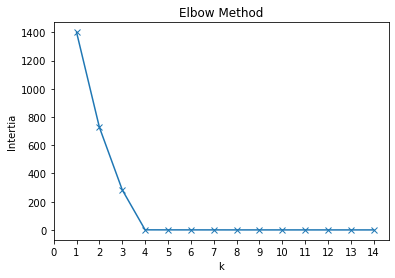

In [111]:
X = x
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [350]:

fig = px.scatter_mapbox(k_df, 
                        lat="lat", 
                        lon="long", 
#                         size="log_price",
                        color = "log_price",
                        
#                         color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10)
fig.show()


NameError: name 'k_df' is not defined

In [94]:

fig = px.scatter_mapbox(x, 
                        lat="lat", 
                        lon="long", 
#                         size="log_price",
                        color = "groups",
                        
#                         color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10)
fig.show()



In [8]:
import geopy
from geopy import Nominatim
from geopy import Point
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Photon, GoogleV3


#using geopy to get the longitude/latitude of the neighborhoods by names
locator = GoogleV3(user_agent="myGeocoder", api_key = config.API_KEY)

geocode = RateLimiter(locator.geocode, min_delay_seconds=0.01)
location2 = {}

for index, address in enumerate(locations["Prop_Addr"]):
    if pd.isnull(address) == False:
        loc = geocode(address + ', Ames, Iowa, USA')
    else: 
        loc = geocode(locations.iloc[index]["Neighborhood_x"] + ', Ames, Iowa, USA')
        
    if loc:
        location2[address] = loc 
        print(index, address, loc)
x_lats = [x.latitude for x in list(location2.values())]
x_longs = [x.longitude for x in list(location2.values())]



RateLimiter caught an error, retrying (0/2 tries). Called with (*('436 HAYWARD AVE, Ames, Iowa, USA',), **{}).
Traceback (most recent call last):
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/geopy/extra/rate_limiter.py", line 136, in _retries_gen
    yield i  # Run the function.
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/geopy/extra/rate_limiter.py", line 274, in __call__
    res = self.func(*args, **kwargs)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/geopy/geocoders/google.py", line 270, in geocode
    return self._call_geocoder(url, callback, timeout=timeout)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/geopy/geocoders/base.py", line 386, in _call_geocoder
    return callback(result)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/geopy/geocoders/google.py", line 397, in _parse_json
    self._check_status(page.get('status'))
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/geopy/geocoder

KeyboardInterrupt: 

## Neighborhood Classification

In [34]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dtreeviz.trees import dtreeviz

In [8]:
df = pd.read_csv("./../communal/Ames_Housing_Price_Data_cleaned_3.csv")
pd.set_option('display.max_columns', 500)

In [271]:
neighborhood_df = df[["Neighborhood", "lat","long","SalePrice","LotArea"]]

In [272]:
neighborhood_df["log_price"] = np.log(neighborhood_df["SalePrice"])

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [273]:
X = neighborhood_df[["lat","long"]]
y = neighborhood_df[["SalePrice"]]

In [298]:
model = tree.DecisionTreeRegressor(max_depth=3)

In [299]:
model.fit(X.values,y.values)

DecisionTreeRegressor(max_depth=3)

In [300]:
model.score(X,y)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.46247445239411067

In [304]:
model.score(X,y)


/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.46247445239411067

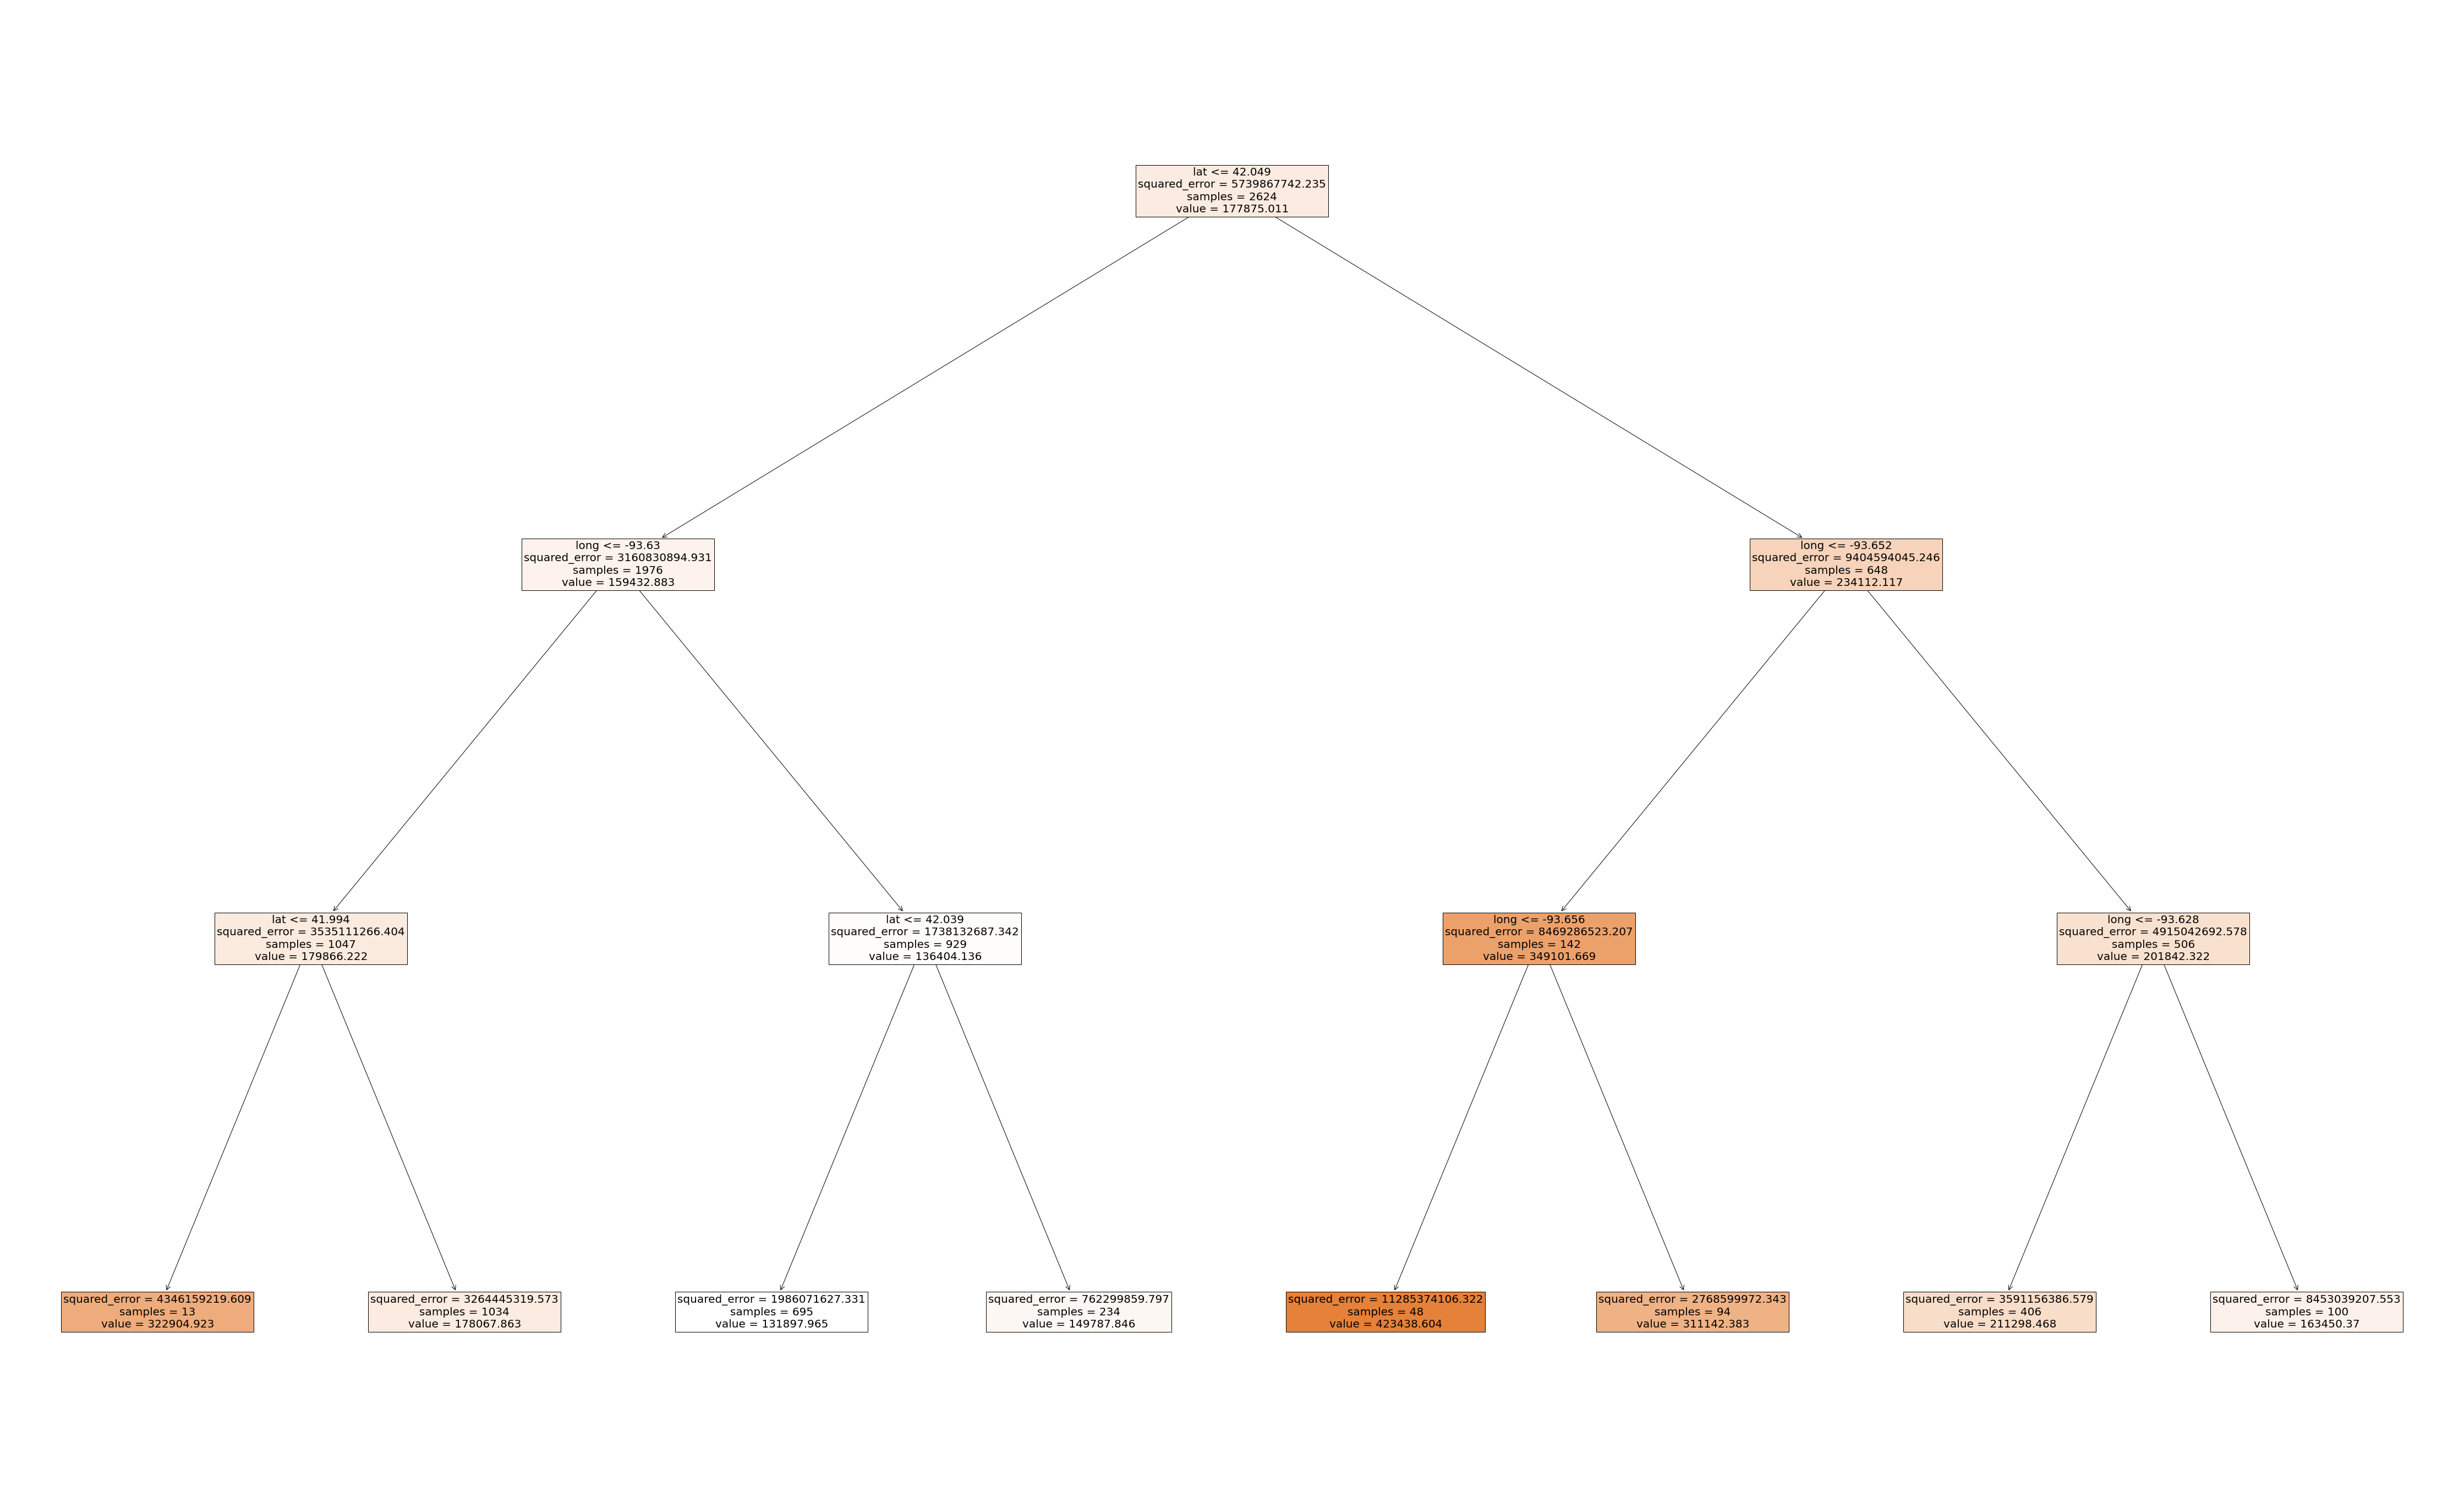

In [305]:
plt.figure(figsize=(80,50))
tree.plot_tree(model, feature_names=["lat", "long"], filled=True,impurity=True, fontsize=20)
plt.show()

In [264]:
model = tree.DecisionTreeClassifier(max_depth=5)

In [265]:
neighborhood_df.head()

Neighborhood        lat       long  SalePrice  LotArea
0        SWISU  42.017780 -93.651452     126000     7890
1      Edwards  42.024697 -93.664186     139500     4235
2      Edwards  42.024697 -93.664186     139500     4235
3       IDOTRR  42.021389 -93.614855     124900     6060
4      OldTown  42.038070 -93.612065     114000     8146

In [266]:
X_ = neighborhood_df[["lat","long"]]
y_ = neighborhood_df[["Neighborhood"]]

In [267]:
model.fit(X_.values, y_.values)

DecisionTreeClassifier(max_depth=5)

In [268]:
model.score(X_.values, y_.values)

0.7896341463414634

In [269]:
neighborhood_df["Neighborhood"].unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

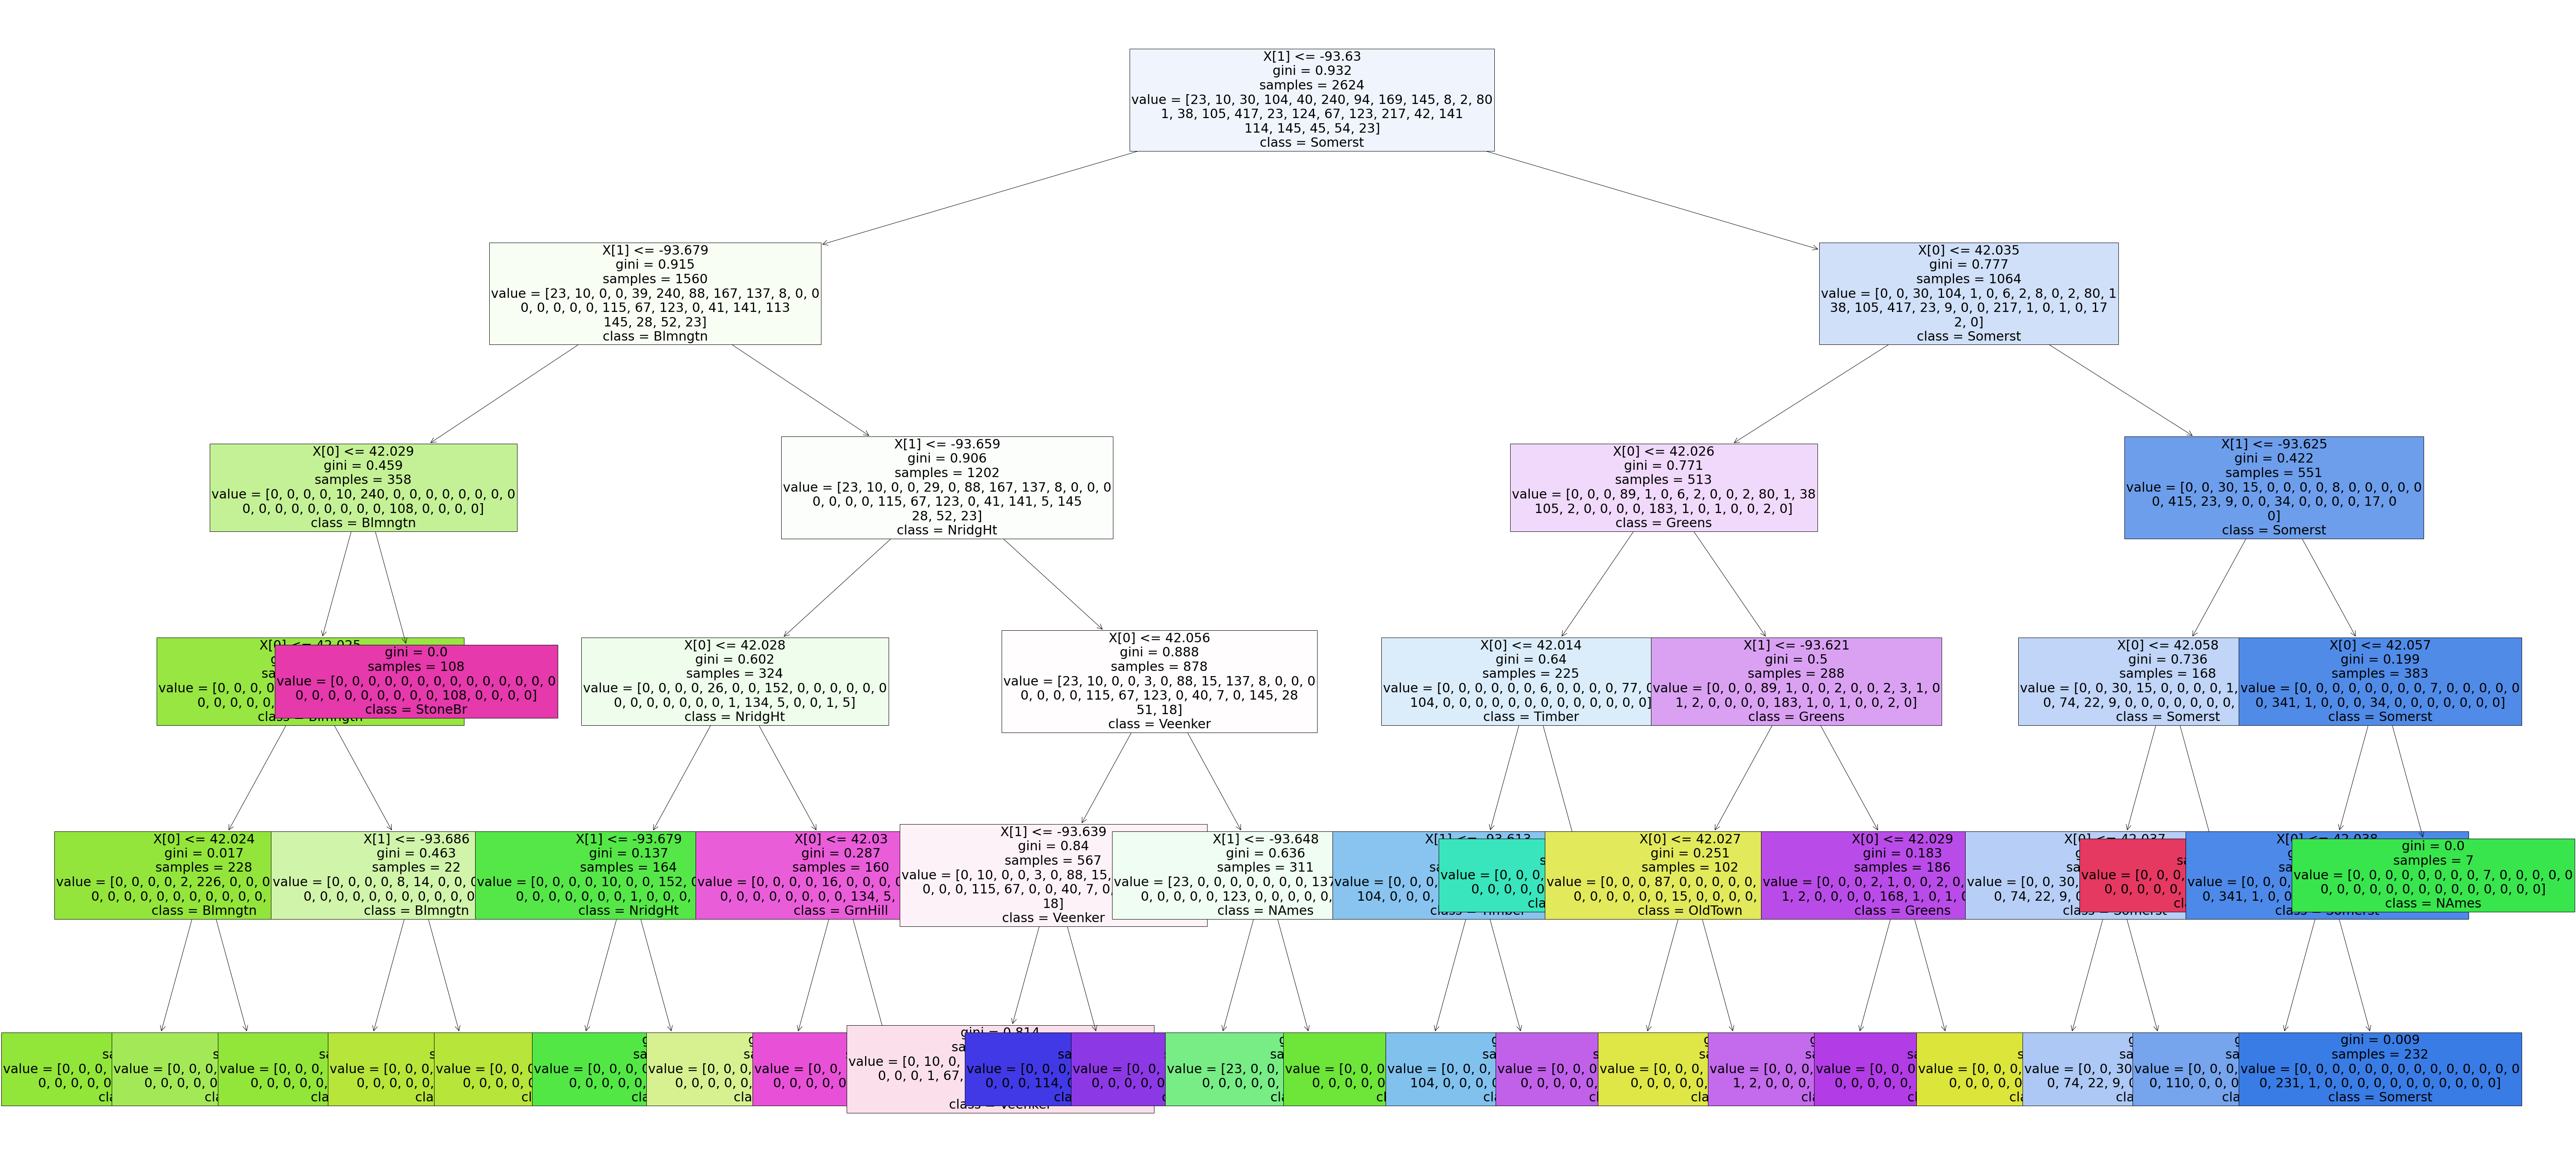

In [270]:
plt.figure(figsize=(100,50))
tree.plot_tree(model, class_names =neighborhood_df["Neighborhood"].unique(),filled=True, fontsize=30)
plt.show()

In [554]:
values

lat       long  Neighborhood  SalePrice   knn
0     42.017780 -93.651452            21     126000   344
1     42.024697 -93.664186             7     139500  1025
2     42.024697 -93.664186             7     139500  1025
3     42.021389 -93.614855            11     124900   132
4     42.038070 -93.612065            20     114000  1894
...         ...        ...           ...        ...   ...
2619  42.031937 -93.626510             3     121000  1365
2620  42.027798 -93.666899             7     139600  1588
2621  42.019944 -93.643206             6     145000  2522
2622  42.016826 -93.690382             5     217500   150
2623  42.031651 -93.682452            23     215000   181

[2624 rows x 5 columns]

In [555]:
values = neighborhood_df[["Neighborhood", "SalePrice"]]

In [556]:
from sklearn import preprocessing

In [557]:
le = preprocessing.LabelEncoder()

In [558]:
g = le.fit_transform(values["Neighborhood"])

In [559]:
values["Neighborhood"] = g

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [595]:
x = values.iloc[:,0]
y = values.iloc[:,1]

In [561]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [566]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [602]:
a = np.matrix(x)
b = np.matrix(y)

In [615]:
a = a.reshape(2624,1)
b = b.reshape(2624,1)


In [617]:
neigh.fit(a, b)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:590: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(n_neighbors=3)

In [620]:
asd = neigh.kneighbors()

In [622]:
asd[1][:,2]

array([340,   2,  52, ..., 154,  58, 127])

In [628]:
values["knn"] = asd[1][:,2]

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [629]:
values.sort_values(by="Neighborhood")

Neighborhood  SalePrice   knn
1133             0     160000  1918
1274             0     219990  1918
1277             0     160200  1918
2447             0     180000  1918
2541             0     234000  1918
...            ...        ...   ...
494             27     260000  1510
163             27     245500  1510
2341            27     270000  1510
794             27     324000  1510
158             27     217500  1510

[2624 rows x 3 columns]

In [649]:
sns.barplot(values["knn"],values["SalePrice"])

/Users/tonypark/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='knn', ylabel='SalePrice'>

In [552]:
values.sort_values(by="Neighborhood")

lat       long  Neighborhood  SalePrice   knn
1133  42.062667 -93.642534             0     160000  1221
1274  42.062174 -93.640973             0     219990  2541
1277  42.062241 -93.642882             0     160200   398
2447  42.062135 -93.642812             0     180000   997
2541  42.062709 -93.641245             0     234000   943
...         ...        ...           ...        ...   ...
494   42.037402 -93.660700            27     260000  2367
163   42.045012 -93.647655            27     245500   158
2341  42.044844 -93.649304            27     270000  2222
794   42.044483 -93.649010            27     324000  2222
158   42.045133 -93.649046            27     217500  2222

[2624 rows x 5 columns]

In [472]:
km = KMeans(5).fit_predict(values.values)

In [461]:
import seaborn as sns

In [473]:
values["groups"] = km

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [413]:
x.groupby("groups")["lat"].agg({np.mean, np.std, np.min, np.max, np.size})

size       amin       amax       std       mean
groups                                                 
0        694  41.988835  42.063401  0.019555  42.036560
1         82  41.992793  42.063320  0.019075  42.051326
2        485  41.986374  42.059801  0.014236  42.028509
3       1043  41.986321  42.063339  0.016420  42.031927
4        318  41.989452  42.063284  0.019380  42.041754

/Users/tonypark/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='lat', ylabel='long'>

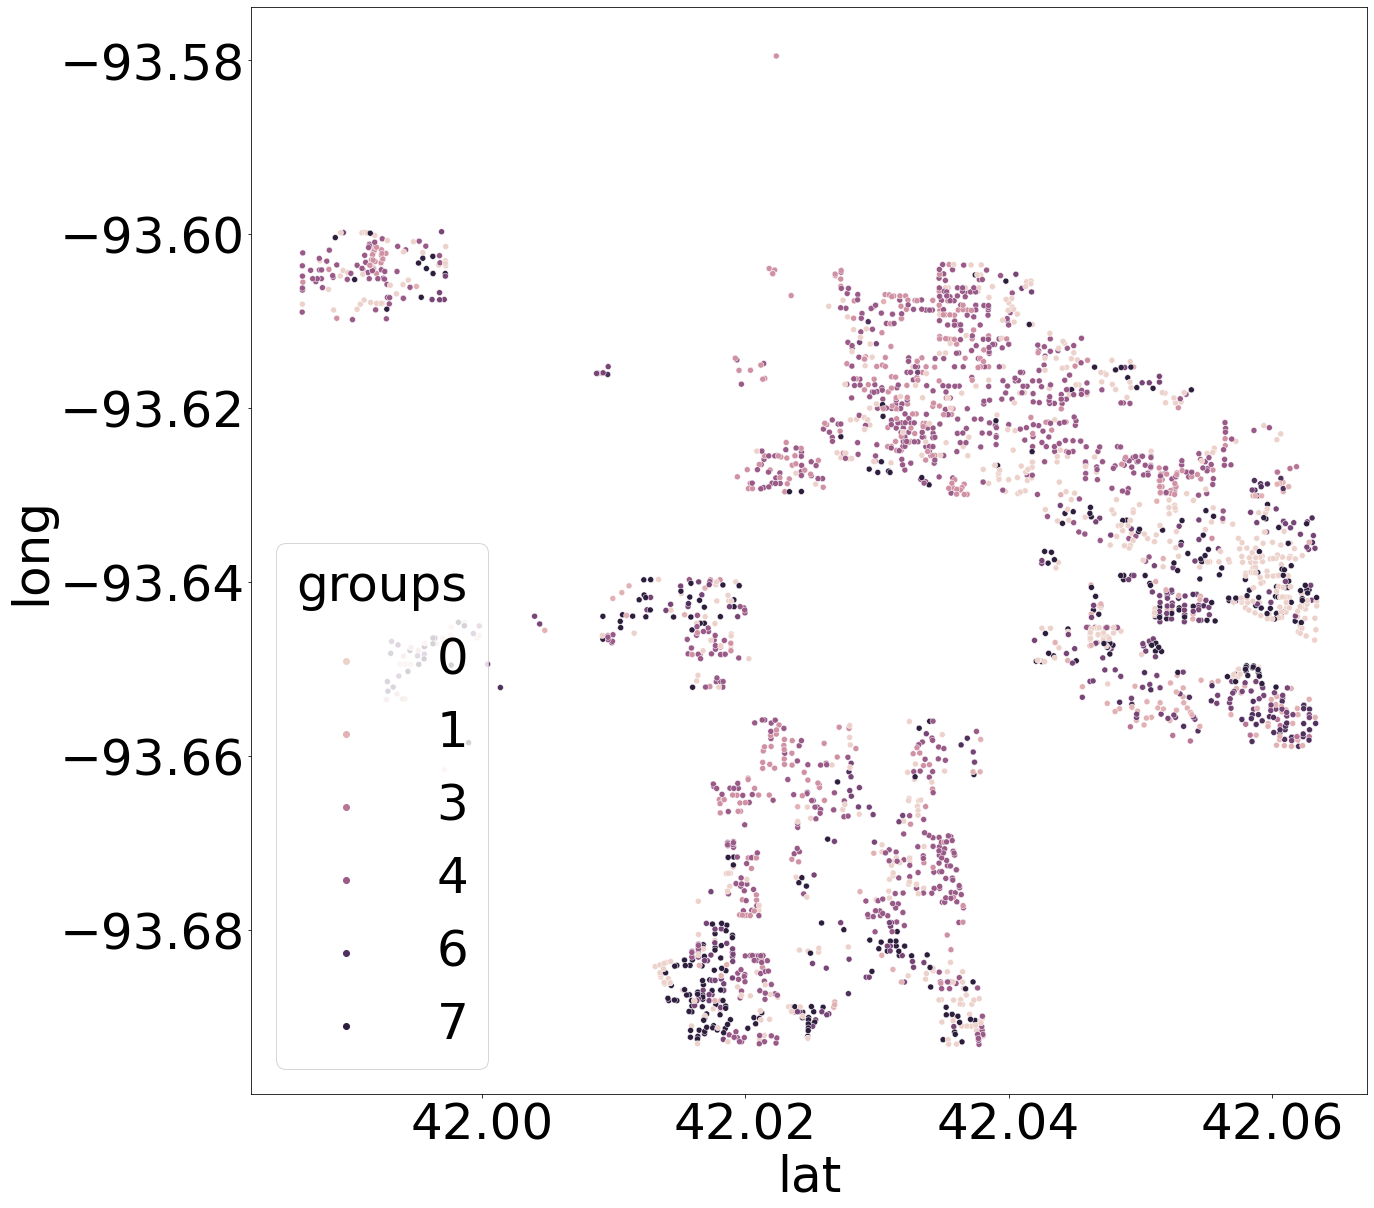

In [343]:
plt.figure(figsize=(20,20))
sns.scatterplot(values["lat"], values["long"], hue=values["groups"])

In [475]:
values.sort_values(by="Neighborhood")

lat       long  Neighborhood  groups
1133  42.062667 -93.642534             0       3
1274  42.062174 -93.640973             0       3
1277  42.062241 -93.642882             0       3
2447  42.062135 -93.642812             0       3
2541  42.062709 -93.641245             0       3
...         ...        ...           ...     ...
494   42.037402 -93.660700            27       0
163   42.045012 -93.647655            27       0
2341  42.044844 -93.649304            27       0
794   42.044483 -93.649010            27       0
158   42.045133 -93.649046            27       0

[2624 rows x 4 columns]

In [497]:
values[values["Neighborhood"]==19]

array([4], dtype=int32)

In [476]:
plt.figure(figsize=(20,20))

fig = px.scatter_mapbox(values, 
                        lat="lat", 
                        lon="long", 
                        color = "groups",
                        size_max=15, 
                        zoom=10)
fig.show()


<Figure size 1440x1440 with 0 Axes>

In [368]:
plt.figure(figsize=(20,20))

fig = px.scatter_mapbox(values, 
                        lat="lat", 
                        lon="long", 
                        color = "SalePrice",
                        size_max=15, 
                        zoom=10)
fig.show()

<Figure size 1440x1440 with 0 Axes>